## Importing all necessary utilities

In [31]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Reading in all the images and printing 1 out to check

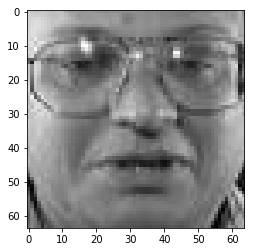

In [15]:
imgs = []

for i in range(400):
    imgs.append(mpimg.imread("Face Data/%d.jpg" % i))
    
%matplotlib inline
plt.imshow(imgs[1], cmap=plt.cm.gray)

## Creating the dataframe of pixels for each image that contains a 64x64 pixel range

In [16]:
cols = []
for x in range(4096):
    cols.append("P%d" % x)
df=pd.DataFrame(columns = cols)

c = 0
for x in range(400):
    pixel = imgs[x].flatten()
    df.loc[x] = pixel
    c+=1
    
df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P4086,P4087,P4088,P4089,P4090,P4091,P4092,P4093,P4094,P4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117
5,44,58,92,98,176,195,176,198,198,203,...,134,138,144,168,58,50,50,57,52,67
6,120,168,184,185,184,181,190,186,187,182,...,111,162,214,215,113,44,46,53,56,54
7,111,126,161,200,220,220,220,225,228,230,...,19,18,23,19,20,30,37,40,44,50
8,158,162,168,174,180,188,196,201,202,207,...,106,113,112,114,111,105,102,98,84,70
9,26,46,69,84,96,110,121,126,123,126,...,36,53,65,54,47,88,88,82,46,38


## Getting the labels

In [17]:
lbls = pd.read_csv("https://raw.githubusercontent.com/caceresdaniel/DataScience/master/Face%20Data/label.csv")
y = lbls['Label']

## Scaling the features

In [18]:
pixel_data = preprocessing.scale(df)

## Splitting the data into testing and training

In [19]:
x_train, x_test, y_train, y_test = train_test_split(pixel_data, y, test_size=0.25,random_state=5)

## Using PCA to lower the dimensionality of the features

In [22]:
k = 50
my_pca = PCA(n_components=k)
x_train_new = my_pca.fit_transform(x_train)
x_test_new = my_pca.transform(x_test)

## Designing a non-linear SVM classifier to recognize the face based on the training dataset and Printing out the accuracy 

In [46]:
svc = SVC(C=1, kernel='rbf', gamma=0.0005,
random_state=1)

svc.fit(x_train_new, y_train)
y_predict = svc.predict(x_test_new)
acc = accuracy_score(y_test,y_predict)
print("The accuracy is %f" % acc)
cm = confusion_matrix(y_test,y_predict)
print(cm)

The accuracy is 0.910000
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


## Creating a dict of C values for the GridSearchCV to find the best C for the SVM

In [39]:
vals = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

param_grid=dict(C = vals)

x_normalized = preprocessing.normalize(pixel_data)

x_normalized_pca = my_pca.fit_transform(x_normalized)


grid = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', verbose=True)

grid.fit(x_normalized_pca, y)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

## Printing the best C

In [44]:
print("The best C is %s" % grid.best_params_)

The best C is {'C': 5000.0}
